In [1]:
import pandas as pd
import numpy as np
import miceforest as mf

In [2]:
df = pd.read_csv("../data/V2_BPD_CRIME_DATA_WITHDEMOGRAPHICS.csv")


In [3]:
df.head(20)

,Unnamed: 0,CrimeDate,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,...,perc18_24,perc25_64,perc65up,perc_asian,perc_aa,perc_hisp,perc_white,median_price_homes_sold,racial_diversity_index,num_households
0,0,2017-09-02,ROBBERY - RESIDENCE,INSIDE,KNIFE,913.0,SOUTHERN,BROOKLYN,-76.60541,39.22951,...,8.248062,57.449612,7.302326,2.527132,37.961240,14.906977,39.682171,52000.0,73.926734,45000.0
1,1,2017-09-02,AUTO THEFT,OUTSIDE,NONE,133.0,CENTRAL,RESERVOIR HILL,-76.63217,39.31360,...,8.231621,56.940108,11.003879,0.624468,83.990917,2.876336,10.966033,127500.0,31.631200,78950.0
2,2,2017-09-02,SHOOTING,OUTSIDE,FIREARM,524.0,NORTHERN,WINSTON-GOVANS,-76.60697,39.34768,...,7.664336,52.242424,15.599068,0.093240,90.013986,1.948718,6.685315,71300.0,20.532109,60000.0
3,3,2017-09-02,AGG. ASSAULT,INSIDE,OTHER,934.0,SOUTHERN,CARROLLTON RIDGE,-76.64526,39.28315,...,7.730214,52.805320,10.888797,2.873597,73.573591,6.732767,12.782758,40000.0,49.751399,22500.0
4,4,2017-09-02,COMMON ASSAULT,OUTSIDE,HANDS,113.0,CENTRAL,DOWNTOWN WEST,-76.61365,39.28756,...,18.475432,71.268942,4.990051,16.255931,29.021889,4.959437,43.961427,207000.0,69.322521,207000.0
5,5,2017-09-02,BURGLARY,INSIDE,NONE,922.0,SOUTHERN,CHERRY HILL,-76.62131,39.24867,...,9.134854,45.575112,9.779375,0.929598,87.469013,5.813089,4.362915,45000.0,30.277140,38000.0
6,6,2017-09-02,HOMICIDE,OUTSIDE,FIREARM,232.0,SOUTHEASTERN,CANTON,-76.56827,39.28202,...,5.849147,75.246217,10.533269,4.383858,3.939467,3.086716,85.575306,306500.0,26.305424,285500.0
7,7,2017-09-02,ROBBERY - STREET,OUTSIDE,NONE,123.0,CENTRAL,UPTON,-76.62789,39.30254,...,11.429971,47.277179,10.803134,1.860921,91.635651,0.636631,4.221352,100000.0,16.462884,53465.0
8,8,2017-09-02,AGG. ASSAULT,OUTSIDE,OTHER,641.0,NORTHWESTERN,WINDSOR HILLS,-76.68365,39.31370,...,7.680189,54.647499,15.064986,0.059078,95.057109,1.024025,2.116975,85000.0,10.833830,65500.0
9,9,2017-09-02,COMMON ASSAULT,INSIDE,HANDS,332.0,EASTERN,BEREA,-76.57419,39.30551,...,8.788912,52.139479,15.157848,0.417996,93.664063,2.034980,2.364976,42786.0,14.578103,20000.0


In [4]:
df = df.drop(columns=["Unnamed: 0"])


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263121 entries, 0 to 263120
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CrimeDate                 263121 non-null  object 
 1   Description               263121 non-null  object 
 2   Inside/Outside            263121 non-null  object 
 3   Weapon                    263121 non-null  object 
 4   Post                      263121 non-null  float64
 5   District                  263121 non-null  object 
 6   Neighborhood              263121 non-null  object 
 7   Longitude                 263121 non-null  float64
 8   Latitude                  263121 non-null  float64
 9   Premise                   263121 non-null  object 
 10  Season                    263121 non-null  object 
 11  Month                     263121 non-null  int64  
 12  Hour                      263121 non-null  int64  
 13  Year                      263121 non-null  i

Looks like the new neighborhood matching filled many missing values now!


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
Neighborhood = pd.read_csv("../data/V2_Neighborhood_decoder.csv", header=None)
le.fit(Neighborhood[0])


LabelEncoder()

In [8]:
df["Neighborhood"]=le.transform(df["Neighborhood"])


In [9]:
df.head(5)


,CrimeDate,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Premise,...,perc18_24,perc25_64,perc65up,perc_asian,perc_aa,perc_hisp,perc_white,median_price_homes_sold,racial_diversity_index,num_households
0,2017-09-02,ROBBERY - RESIDENCE,INSIDE,KNIFE,913.0,SOUTHERN,26,-76.60541,39.22951,ROW/TOWNHO,...,8.248062,57.449612,7.302326,2.527132,37.961240,14.906977,39.682171,52000.0,73.926734,45000.0
1,2017-09-02,AUTO THEFT,OUTSIDE,NONE,133.0,CENTRAL,213,-76.63217,39.31360,STREET,...,8.231621,56.940108,11.003879,0.624468,83.990917,2.876336,10.966033,127500.0,31.631200,78950.0
2,2017-09-02,SHOOTING,OUTSIDE,FIREARM,524.0,NORTHERN,267,-76.60697,39.34768,STREET,...,7.664336,52.242424,15.599068,0.093240,90.013986,1.948718,6.685315,71300.0,20.532109,60000.0
3,2017-09-02,AGG. ASSAULT,INSIDE,OTHER,934.0,SOUTHERN,37,-76.64526,39.28315,ROW/TOWNHO,...,7.730214,52.805320,10.888797,2.873597,73.573591,6.732767,12.782758,40000.0,49.751399,22500.0
4,2017-09-02,COMMON ASSAULT,OUTSIDE,HANDS,113.0,CENTRAL,63,-76.61365,39.28756,STREET,...,18.475432,71.268942,4.990051,16.255931,29.021889,4.959437,43.961427,207000.0,69.322521,207000.0


In [10]:
Premise = pd.read_csv("../data/V2_Premise_decoder.csv", header=None)
le.fit(Premise[0])


LabelEncoder()

In [11]:
df["Premise"]=le.transform(df["Premise"])


In [12]:
District = pd.read_csv("../data/V2_District_decoder.csv", header=None)
le.fit(District[0])


LabelEncoder()

In [13]:
df["District"]=le.transform(df["District"])

In [14]:
Description = pd.read_csv("../data/V2_Description_decoder.csv", header=None)
le.fit(Description[0])


LabelEncoder()

In [15]:
df["Description"]=le.transform(df["Description"])

In [16]:
df.head()

,CrimeDate,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Premise,...,perc18_24,perc25_64,perc65up,perc_asian,perc_aa,perc_hisp,perc_white,median_price_homes_sold,racial_diversity_index,num_households
0,2017-09-02,11,INSIDE,KNIFE,913.0,6,26,-76.60541,39.22951,69,...,8.248062,57.449612,7.302326,2.527132,37.961240,14.906977,39.682171,52000.0,73.926734,45000.0
1,2017-09-02,3,OUTSIDE,NONE,133.0,0,213,-76.63217,39.31360,78,...,8.231621,56.940108,11.003879,0.624468,83.990917,2.876336,10.966033,127500.0,31.631200,78950.0
2,2017-09-02,14,OUTSIDE,FIREARM,524.0,3,267,-76.60697,39.34768,78,...,7.664336,52.242424,15.599068,0.093240,90.013986,1.948718,6.685315,71300.0,20.532109,60000.0
3,2017-09-02,0,INSIDE,OTHER,934.0,6,37,-76.64526,39.28315,69,...,7.730214,52.805320,10.888797,2.873597,73.573591,6.732767,12.782758,40000.0,49.751399,22500.0
4,2017-09-02,5,OUTSIDE,HANDS,113.0,0,63,-76.61365,39.28756,78,...,18.475432,71.268942,4.990051,16.255931,29.021889,4.959437,43.961427,207000.0,69.322521,207000.0


In [17]:
df = pd.get_dummies(df, columns=["Inside/Outside"],drop_first=True)
df= df.rename(columns={"Inside/Outside_OUTSIDE":"Outside"})


In [18]:
df = pd.get_dummies(df, columns=["Weapon", "Season"])


In [19]:
from pandas.tseries.holiday import USFederalHolidayCalendar
calendar = USFederalHolidayCalendar()


In [20]:
df.CrimeDate = pd.to_datetime(df.CrimeDate)
dr = pd.date_range(start='2012-01-01', end='2017-09-02')
holidays = calendar.holidays(start=dr.min(), end=dr.max())

df['Holiday'] = df['CrimeDate'].isin(holidays)

In [21]:
df['Holiday'] = df['Holiday'].replace(False, 0)
df['Holiday'] = df['Holiday'].replace(True, 1)

In [22]:
df["Weekday"] = pd.to_datetime(df["CrimeDate"]).dt.dayofweek
df["Weekend"] = (df["Weekday"] > 4).astype(int)
df = df.drop(columns=["Weekday"])


In [23]:
df.columns


Index(['CrimeDate', 'Description', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Premise', 'Month', 'Hour', 'Year', 'CSA',
       'median_household_income', 'households_below_poverty', 'perc18_24',
       'perc25_64', 'perc65up', 'perc_asian', 'perc_aa', 'perc_hisp',
       'perc_white', 'median_price_homes_sold', 'racial_diversity_index',
       'num_households', 'Outside', 'Weapon_FIREARM', 'Weapon_HANDS',
       'Weapon_KNIFE', 'Weapon_NONE', 'Weapon_OTHER', 'Season_autumn',
       'Season_spring', 'Season_summer', 'Season_winter', 'Holiday',
       'Weekend'],
      dtype='object')

In [24]:
df = df.drop(columns=["CrimeDate","CSA"])

Alright, imputation time



In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263121 entries, 0 to 263120
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Description               263121 non-null  int32  
 1   Post                      263121 non-null  float64
 2   District                  263121 non-null  int32  
 3   Neighborhood              263121 non-null  int32  
 4   Longitude                 263121 non-null  float64
 5   Latitude                  263121 non-null  float64
 6   Premise                   263121 non-null  int32  
 7   Month                     263121 non-null  int64  
 8   Hour                      263121 non-null  int64  
 9   Year                      263121 non-null  int64  
 10  median_household_income   246601 non-null  float64
 11  households_below_poverty  246601 non-null  float64
 12  perc18_24                 246601 non-null  float64
 13  perc25_64                 246601 non-null  f

In [25]:
kernel = mf.MultipleImputedKernel(data=df, save_all_iterations=True,random_state=42069)


In [26]:
kernel.mice(5,verbose=True,n_jobs=-1)


Dataset 0
1  | median_household_income | households_below_poverty | perc18_24 | perc25_64 | perc65up | perc_asian | perc_aa | perc_hisp | perc_white | median_price_homes_sold | racial_diversity_index | num_households
2  | median_household_income | households_below_poverty | perc18_24 | perc25_64 | perc65up | perc_asian | perc_aa | perc_hisp | perc_white | median_price_homes_sold | racial_diversity_index | num_households
3  | median_household_income | households_below_poverty | perc18_24 | perc25_64 | perc65up | perc_asian | perc_aa | perc_hisp | perc_white | median_price_homes_sold | racial_diversity_index | num_households
4  | median_household_income | households_below_poverty | perc18_24 | perc25_64 | perc65up | perc_asian | perc_aa | perc_hisp | perc_white | median_price_homes_sold | racial_diversity_index | num_households
5  | median_household_income | households_below_poverty | perc18_24 | perc25_64 | perc65up | perc_asian | perc_aa | perc_hisp | perc_white | median_price_homes_so

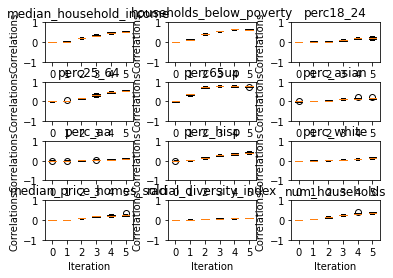

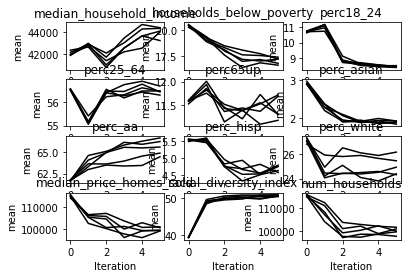

In [28]:
kernel.plot_correlations(wspace=0.4,hspace=0.5)
kernel.plot_mean_convergence()


Not great, but there are a lot of variables to impute. So not bad over all.


Let's do something a little different though. As the statistics are by neighborhood, let's take the average imputed values for each demographic column per neighborhood.

First, let's see which neighborhoods have missing demo data.

In [30]:
df_NA = df[df.isna().any(axis=1)]

In [41]:
missing_neigh = list(df_NA["Neighborhood"].unique())

In [49]:
temp = df.dropna()

In [53]:
temp[temp["Neighborhood"].isin(missing_neigh)]

,Description,Post,District,Neighborhood,Longitude,Latitude,Premise,Month,Hour,Year,...,Weapon_HANDS,Weapon_KNIFE,Weapon_NONE,Weapon_OTHER,Season_autumn,Season_spring,Season_summer,Season_winter,Holiday,Weekend


In [55]:
missing_neigh


[161, 50, 105, 33, 255, 143, 272, 235, 115, 162, 236, 192, 51, 229, 189]

In [56]:
completed_data = kernel.complete_data(0)


In [58]:
means = completed_data.groupby("Neighborhood").mean()

In [72]:
means.loc[0] #gives the mean values for Neighborhood 0

Description                      6.092105
Post                           513.000000
District                         3.000000
Longitude                      -76.610755
Latitude                        39.326156
Premise                         60.546784
Month                            6.422515
Hour                            12.707602
Year                          2014.288012
median_household_income      32079.406398
households_below_poverty        23.743346
perc18_24                       30.061426
perc25_64                       51.903770
perc65up                         7.732875
perc_asian                      13.221988
perc_aa                         33.263784
perc_hisp                        5.138070
perc_white                      44.233086
median_price_homes_sold     177968.567251
racial_diversity_index          67.562291
num_households              170000.000000
Outside                          0.478070
Weapon_FIREARM                   0.086257
Weapon_HANDS                     0

In [78]:
means_1 = means[["median_household_income","households_below_poverty","perc18_24","perc25_64","perc65up","perc_asian","perc_aa","perc_hisp","perc_white","median_price_homes_sold","racial_diversity_index","num_households"]]

In [81]:
means_1.loc[missing_neigh]

,median_household_income,households_below_poverty,perc18_24,perc25_64,perc65up,perc_asian,perc_aa,perc_hisp,perc_white,median_price_homes_sold,racial_diversity_index,num_households
Neighborhood,,,,,,,,,,,,
161,39365.284733,20.411377,8.108047,54.609735,11.622739,1.658318,67.513252,5.103472,22.327602,92167.844716,48.977228,86861.036082
50,44224.565951,14.284952,8.166410,55.928270,12.274558,1.748075,70.027585,4.377973,20.543227,103620.440842,47.504554,106869.124960
105,54488.705021,11.022557,8.193093,57.859233,11.873033,1.969814,62.200678,3.660667,29.018713,112384.841390,52.376280,119609.020537
33,42661.017540,16.973091,8.550614,56.026512,11.039537,1.740690,58.380259,7.902264,30.465367,103641.311052,58.621103,108569.857398
255,39959.167795,21.711771,9.138640,58.175635,10.082631,2.294766,62.882457,4.856457,27.649100,90546.464412,50.904094,85240.968259
143,42485.227523,20.159916,8.805965,58.044925,10.110776,2.291139,53.831216,6.415997,32.345609,87842.550943,57.273979,87414.905660
272,43080.107957,14.682253,8.342014,54.937599,13.397322,1.598585,71.893307,4.254235,19.375262,103299.974576,44.936465,104281.906780
235,44032.600712,19.617187,9.071878,58.756274,10.153834,2.389855,55.671869,5.128208,31.566194,92354.166667,54.461885,89576.388889
115,41547.120158,16.241289,8.396022,55.017621,13.427975,1.956451,68.151713,4.338069,22.294753,104910.644578,46.721062,102671.581325


In [82]:
missing_means = means_1.loc[missing_neigh]


In [84]:
missing_means["median_household_income"].loc[161]

39365.28473268834

In [86]:
completed_data.loc[completed_data["Neighborhood"]==161,"median_household_income"] = missing_means["median_household_income"].loc[161]

In [90]:
completed_data.loc[completed_data["Neighborhood"]==161]["median_household_income"]

21        39365.284733
587       39365.284733
724       39365.284733
875       39365.284733
877       39365.284733
              ...     
262453    39365.284733
262625    39365.284733
262699    39365.284733
262710    39365.284733
263054    39365.284733
Name: median_household_income, Length: 3104, dtype: float64

In [99]:
for i in missing_neigh:
    completed_data.loc[completed_data["Neighborhood"]==i,"median_household_income"] = missing_means["median_household_income"].loc[i]
    completed_data.loc[completed_data["Neighborhood"]==i,"households_below_poverty"] = missing_means["households_below_poverty"].loc[i]
    completed_data.loc[completed_data["Neighborhood"]==i,"perc18_24"] = missing_means["perc18_24"].loc[i]
    completed_data.loc[completed_data["Neighborhood"]==i,"perc25_64"] = missing_means["perc25_64"].loc[i]
    completed_data.loc[completed_data["Neighborhood"]==i,"perc65up"] = missing_means["perc65up"].loc[i]
    completed_data.loc[completed_data["Neighborhood"]==i,"perc_asian"] = missing_means["perc_asian"].loc[i]
    completed_data.loc[completed_data["Neighborhood"]==i,"perc_aa"] = missing_means["perc_aa"].loc[i]
    completed_data.loc[completed_data["Neighborhood"]==i,"perc_hisp"] = missing_means["perc_hisp"].loc[i]
    completed_data.loc[completed_data["Neighborhood"]==i,"perc_white"] = missing_means["perc_white"].loc[i]
    completed_data.loc[completed_data["Neighborhood"]==i,"median_price_homes_sold"] = missing_means["median_price_homes_sold"].loc[i]
    completed_data.loc[completed_data["Neighborhood"]==i,"racial_diversity_index"] = missing_means["racial_diversity_index"].loc[i]
    completed_data.loc[completed_data["Neighborhood"]==i,"num_households"] = missing_means["num_households"].loc[i]

In [102]:
completed_data.loc[completed_data["Neighborhood"]==255]["median_household_income"]

79        39959.167795
119       39959.167795
134       39959.167795
296       39959.167795
306       39959.167795
              ...     
262562    39959.167795
262582    39959.167795
262750    39959.167795
262761    39959.167795
262964    39959.167795
Name: median_household_income, Length: 3119, dtype: float64

In [103]:
completed_data.to_csv("../data/CRIME_DATA_WITH_MICE_IMPUTED_DEMOGRAPHICS.csv")


In [28]:
import pickle


In [29]:
pickle.dump(kernel, open("MICE_MODEL.sav","wb"))